# MNIST DATA

In [1]:
from mnist import MNIST
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
md = MNIST('mnist_data/mnist_data')

In [11]:
image_train,labels_train = md.load_training()
image_test , labels_test = md.load_testing()

In [12]:
len(image_train[0])

784

In [13]:
ohe = OneHotEncoder()

In [14]:
labels_train = np.array(labels_train).reshape(-1,1)
labels_test = np.array(labels_test).reshape(-1,1)
labels_test


array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]], dtype=uint8)

In [15]:
ohe.fit(labels_train)
labels_train = ohe.transform(labels_train)
labels_test = ohe.transform(labels_test)

In [16]:
labels_train = labels_train.toarray()


In [26]:
labels_test = labels_test.toarray()
labels_test[0,:]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [18]:
labels_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [19]:
labels_test[0:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
image_train = np.array(image_train).reshape(60000,28,28,1)/255
image_test = np.array(image_test).reshape(10000,28,28,1)/255

In [28]:
image_train.shape

(60000, 28, 28, 1)

In [29]:
# show image 
def show_image(data_x,data_y,idx):
    myimage = data_x[idx,:,:,:].reshape(28,28)
    plt.imshow(myimage)
    plt.show()
    print('Real Label :',np.argmax(data_y[idx]))    

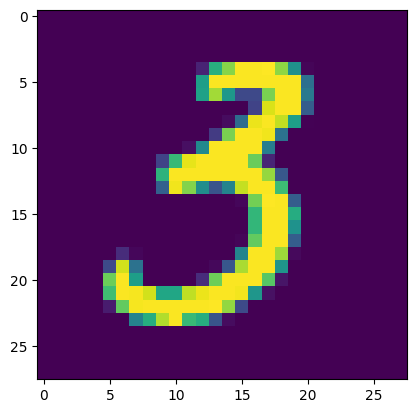

Real Label : 3


In [32]:
show_image(image_train,labels_train,789)

# Model Building

## Input 25,28,1 | Conv : 32 size = 5x5 | pool : 2x2 | conv : 64 | pool : 2x2 
## Dense : 1024,200 
## Output 10



In [33]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Input,Flatten,Conv2D,MaxPool2D

In [50]:
x = Input(shape = (28,28,1))

conv1 = Conv2D(filters = 32, kernel_size = (5,5),activation = 'relu', padding='same',name = 'conv1')(x)
pool1 = MaxPool2D(pool_size = (2,2), name = 'pool1')(conv1)

conv2 = Conv2D(filters = 64, kernel_size = (5,5),activation = 'relu', padding='same',name = 'conv2')(pool1)
pool2 = MaxPool2D(pool_size = (2,2), name = 'pool2')(conv2)

flat = Flatten(name = 'flat')(pool2)

dense1 = Dense(1024,activation='relu',name = 'dense1')(flat)
bn1 = BatchNormalization()(dense1)
dr1 = Dropout(0.2,name= 'dr1')(bn1)

dense2 = Dense(200,activation='relu',name = 'dense2')(dr1)
bn2 = BatchNormalization()(dense2)
dr2 = Dropout(0.2,name= 'dr2')(bn2)

dense3 = Dense(100,activation='relu',name = 'dense3')(dr2)
bn3 = BatchNormalization()(dense3)
dr3 = Dropout(0.2,name= 'dr3')(bn3)

output = Dense(10,activation='softmax')(dr3)

model = Model(inputs = x, outputs = output)

In [51]:
model.compile(loss = 'categorical_crossentropy',optimizer= 'adam',metrics=['acc'])

In [52]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool1 (MaxPooling2D)                 │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool2 (MaxPooling2D)                 │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flat (Flatten)                       │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1 (Dense)                       │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dr1 (Dropout)                        │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 200)                 │         205,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dr2 (Dropout)                        │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense3 (Dense)                       │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dr3 (Dropout)                        │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,495,790 (13.34 MB)

 Trainable params: 3,493,142 (13.33 MB)

 Non-trainable params: 2,648 (10.34 KB)

In [53]:
model.fit(image_train,labels_train,
          validation_data = [image_test,labels_test],
            epochs = 200 , batch_size = 1000,verbose = 1)

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 308ms/step - acc: 0.8408 - loss: 0.5386 - val_acc: 0.5619 - val_loss: 1.5127
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 429ms/step - acc: 0.9827 - loss: 0.0601 - val_acc: 0.6585 - val_loss: 1.2224
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 359ms/step - acc: 0.9900 - loss: 0.0357 - val_acc: 0.9403 - val_loss: 0.7015
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 25s 417ms/step - acc: 0.9928 - loss: 0.0269 - val_acc: 0.9761 - val_loss: 0.3370
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 435ms/step - acc: 0.9940 - loss: 0.0198 - val_acc: 0.9878 - val_loss: 0.1564
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 371ms/step - acc: 0.9966 - loss: 0.0139 - val_acc: 0.9848 - val_loss: 0.0942
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 384ms/step - acc: 0.9962 - loss: 0.0123 - val_acc: 0.9886 - val_loss: 0.0413
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 450ms/step - acc: 0.9975 - loss: 0.0084 - val_acc: 0.9913 - val_loss: 0.0297
Epoch 9/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 2

In [64]:
test_probs = model.predict(image_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [65]:
test_prods.shape

(10000, 10)

In [66]:
labels_test_predicted = np.argmax(test_prods,1)

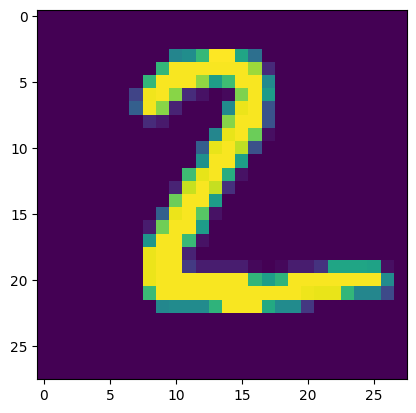

Real Label : 2


In [67]:
show_image(image_test,labels_test,1)

In [68]:
import pandas as pd

In [69]:
pd.crosstab(np.argmax(test_prods,1),np.argmax(labels_test,1))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,979,0,1,0,0,1,3,0,1,0
1,0,1135,1,0,0,0,2,3,0,0
2,0,0,1028,0,0,0,0,1,1,0
3,0,0,0,1009,0,5,0,0,1,0
4,0,0,0,0,978,0,2,0,1,5
5,0,0,0,1,0,884,1,0,0,1
6,0,0,0,0,0,1,949,0,0,0
7,1,0,2,0,0,1,0,1024,1,2
8,0,0,0,0,0,0,1,0,969,0


In [70]:
a = (np.argmax(test_probs,1) == np.argmax(labels_test,1))

In [71]:
incorrect_preds = [i for i,j in enumerate(a) if not j]

In [72]:
incorrect_preds

[321,
 340,
 445,
 447,
 582,
 659,
 1014,
 1232,
 1242,
 1260,
 1299,
 1393,
 1790,
 1878,
 1901,
 2035,
 2070,
 2130,
 2135,
 2462,
 2597,
 2654,
 2896,
 3422,
 3520,
 3558,
 3762,
 3985,
 4284,
 4740,
 4761,
 4823,
 4838,
 4860,
 5246,
 5937,
 6555,
 6571,
 6576,
 6597,
 6625,
 6847,
 9642,
 9729]

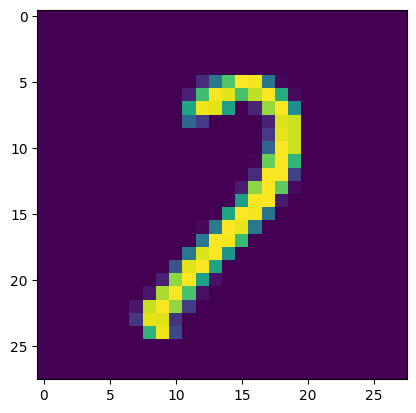

Real Label : 7
predicted label is : 2


In [77]:
idx = 5246
show_image(image_test,labels_test,idx)
print('predicted label is :',labels_test_predicted[idx])

# Extracted Features

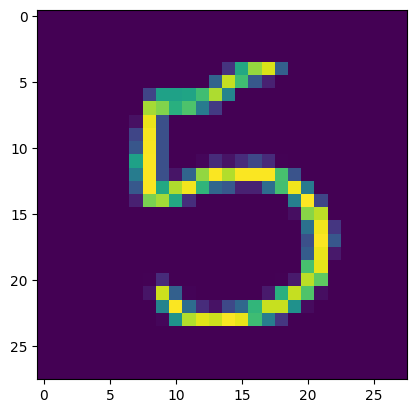

Real Label : 5
predicted label is : 5


In [104]:
idx =  53
show_image(image_test,labels_test,idx)
print('predicted label is :',labels_test_predicted[idx])

In [105]:
conv_layer_1 = Model(inputs = x, outputs = conv1)
pool_layer_1 = Model(inputs = x, outputs = pool1)

conv_layer_2 = Model(inputs = x, outputs = conv2)
pool_layer_2 = Model(inputs = x, outputs = pool2)

flat_layer = Model(inputs = x, outputs = flat)

dense_layer_1 = Model(inputs = x, outputs = dense1)
dense_layer_2 = Model(inputs = x, outputs = dense2)
dense_layer_3 = Model(inputs = x, outputs = dense3)



In [106]:
images_reshape = image_test[idx].reshape((-1,28,28,1))

In [107]:
images_reshape.shape

(1, 28, 28, 1)

In [108]:
conv_layer_1_preds = conv_layer_1.predict(images_reshape)
pool_conv_layer_1_preds = pool_layer_1.predict(images_reshape)
conv_layer_2_preds = conv_layer_2.predict(images_reshape)
pool_conv_layer_2_preds = pool_layer_2.predict(images_reshape)

flat_layer_prob  = flat_layer.predict(images_reshape)

dense_layer_1_preds = dense_layer_1.predict(images_reshape)
dense_layer_2_preds = dense_layer_2.predict(images_reshape)
dense_layer_3_preds = dense_layer_3.predict(images_reshape)

outcome_preds = model.predict(images_reshape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [109]:
conv_layer_1_preds = conv_layer_1_preds.reshape((28,28,32))
pool_conv_layer_1_preds = pool_conv_layer_1_preds.reshape((14,14,32))
conv_layer_2_preds = conv_layer_2_preds.reshape((14,14,64))
pool_conv_layer_2_preds = pool_conv_layer_2_preds.reshape((7,7,64))

flat_layer_prob  = flat_layer_prob.reshape((3136))

dense_layer_1_preds = dense_layer_1_preds.reshape((1024))
dense_layer_2_preds =dense_layer_2_preds.reshape((200))
dense_layer_3_preds = dense_layer_3_preds.reshape((100))

outcome_preds = outcome_preds.reshape(10)

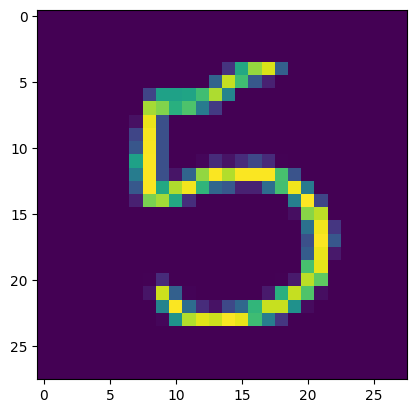

Real Label : 5
predicted label is : 5


In [110]:
idx =  53
show_image(image_test,labels_test,idx)
print('predicted label is :',labels_test_predicted[idx])

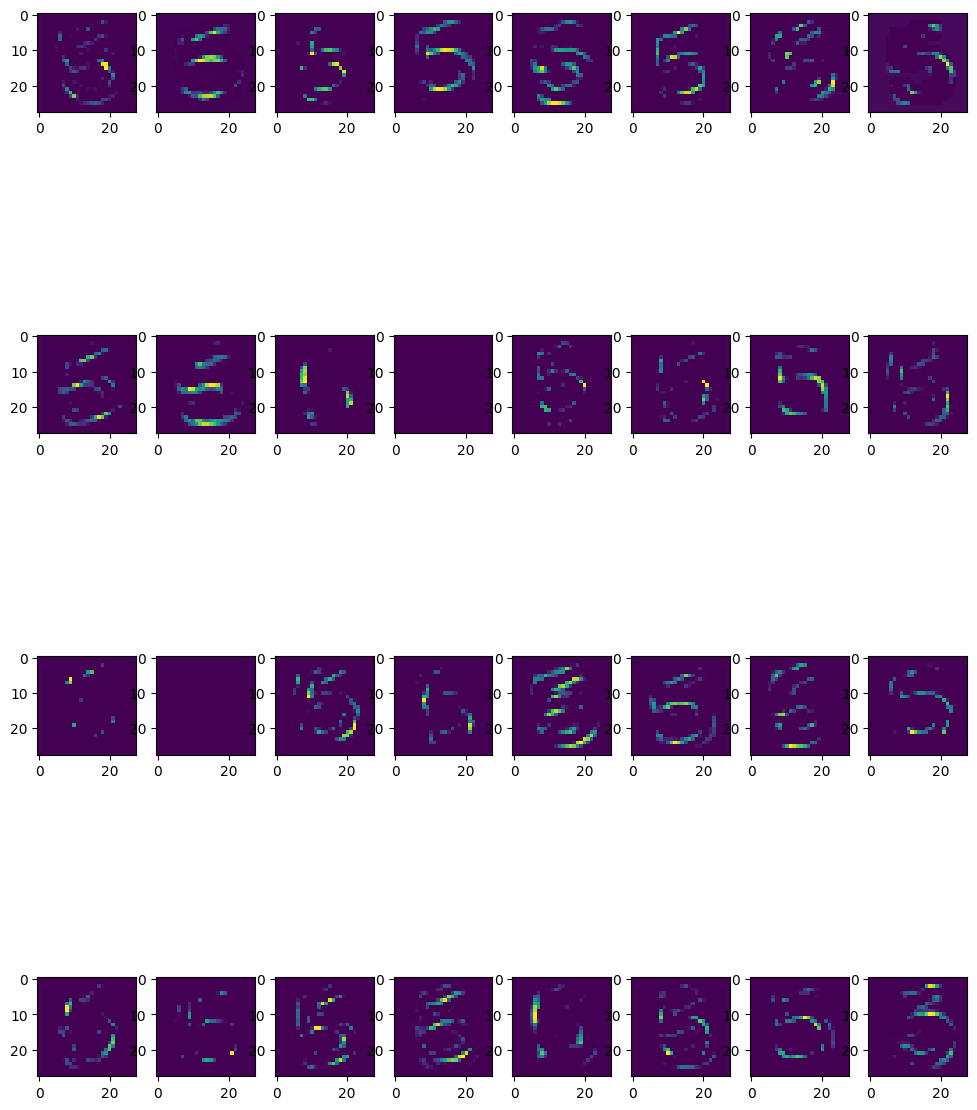

In [111]:
num = 32
num_row = 4 
num_col = 8

fix,axes = plt.subplots(num_row,num_col,figsize = (1.5*num_col,2*num_col))

for i in range(num):
    ax = axes[i//num_col,i%num_col]
    ax.imshow(conv_layer_1_preds[:,:,i])

#plt.tight_layout()
plt.show()

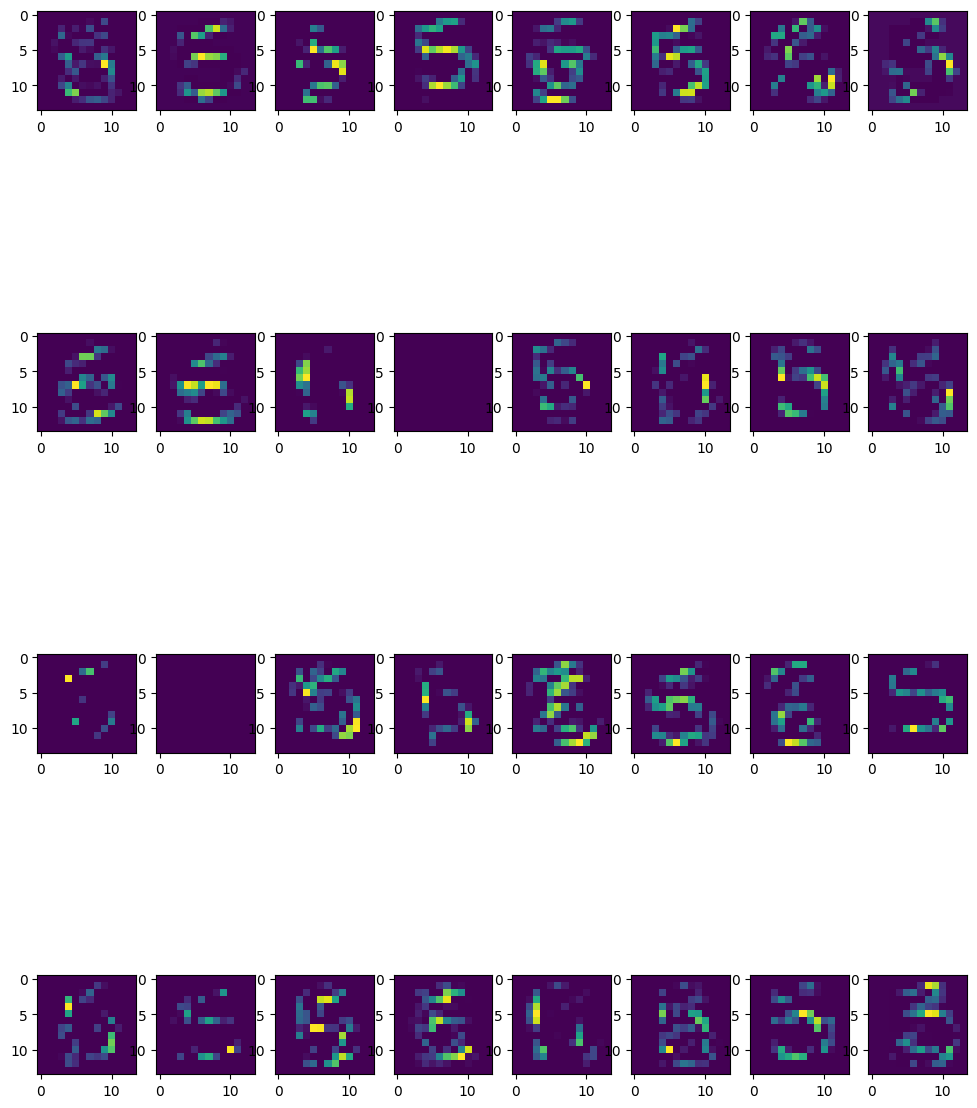

In [112]:
num = 32
num_row = 4 
num_col = 8

fix,axes = plt.subplots(num_row,num_col,figsize = (1.5*num_col,2*num_col))

for i in range(num):
    ax = axes[i//num_col,i%num_col]
    ax.imshow(pool_conv_layer_1_preds[:,:,i])

#plt.tight_layout()
plt.show()

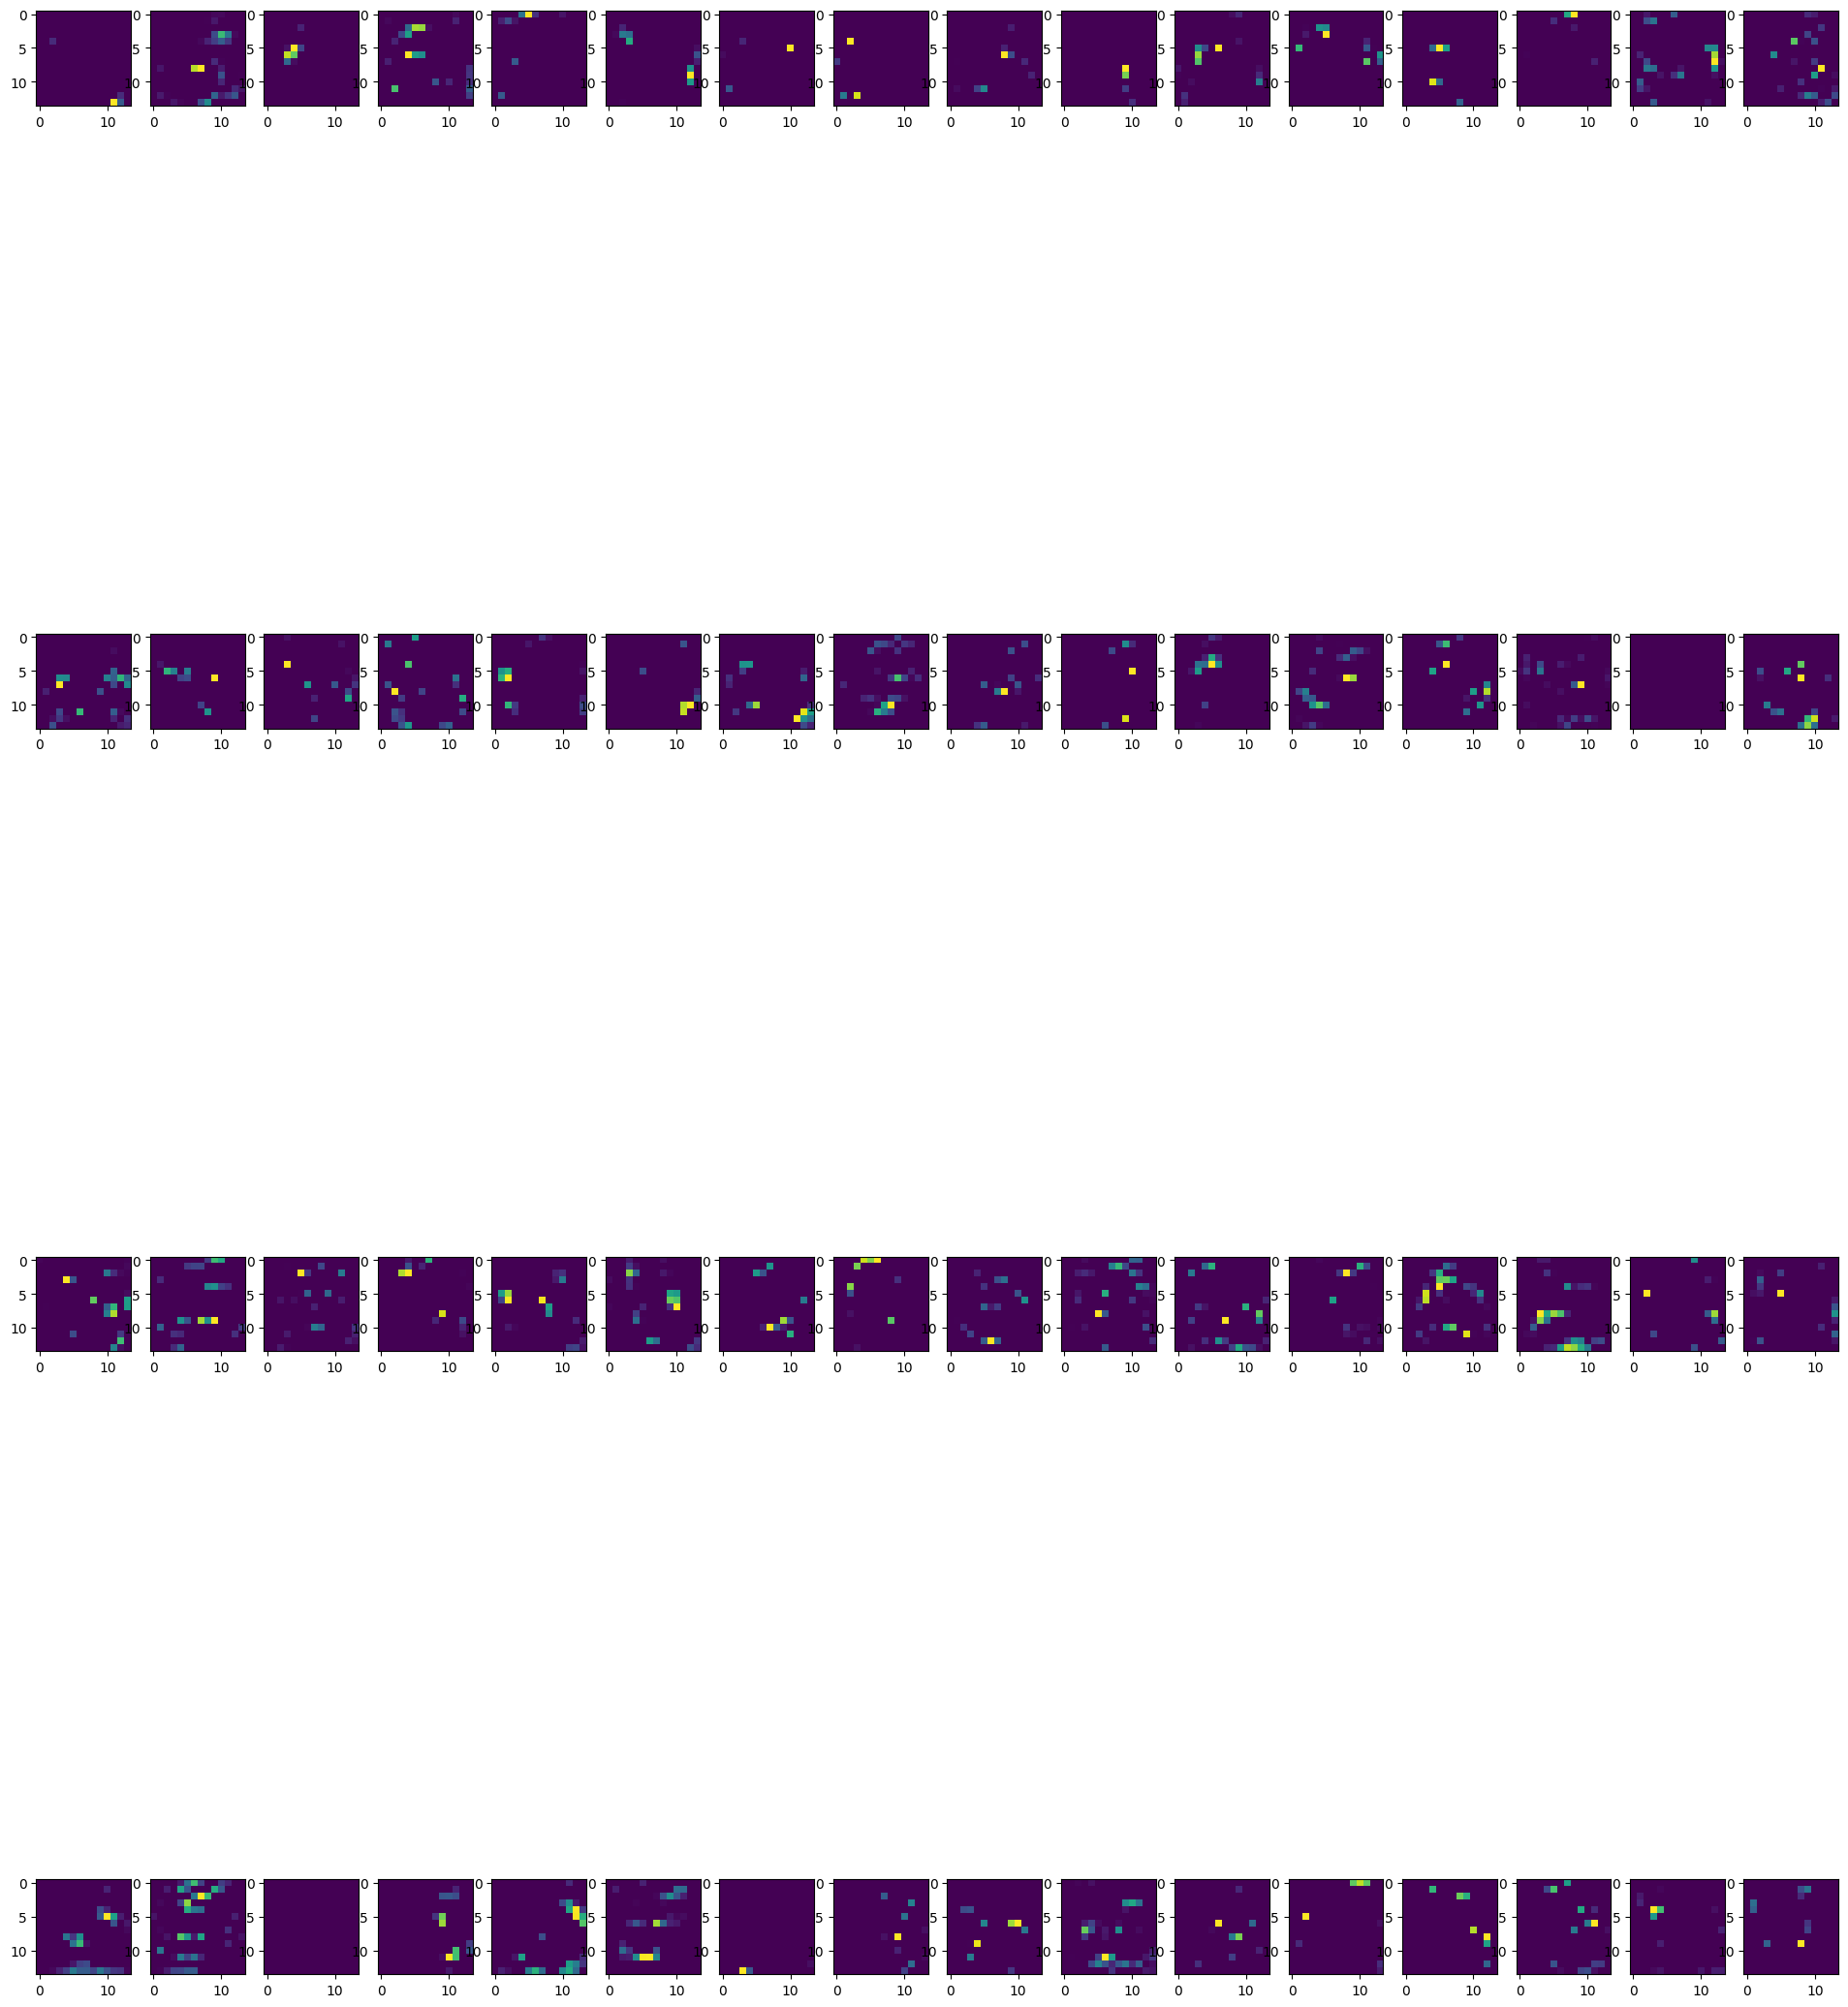

In [117]:
num = 64
num_row = 4 
num_col = 16

fix,axes = plt.subplots(num_row,num_col,figsize = (1.5*num_col,2*num_col))

for i in range(num):
    ax = axes[i//num_col,i%num_col]
    ax.imshow(conv_layer_2_preds[:,:,i])

#plt.tight_layout()
plt.show()

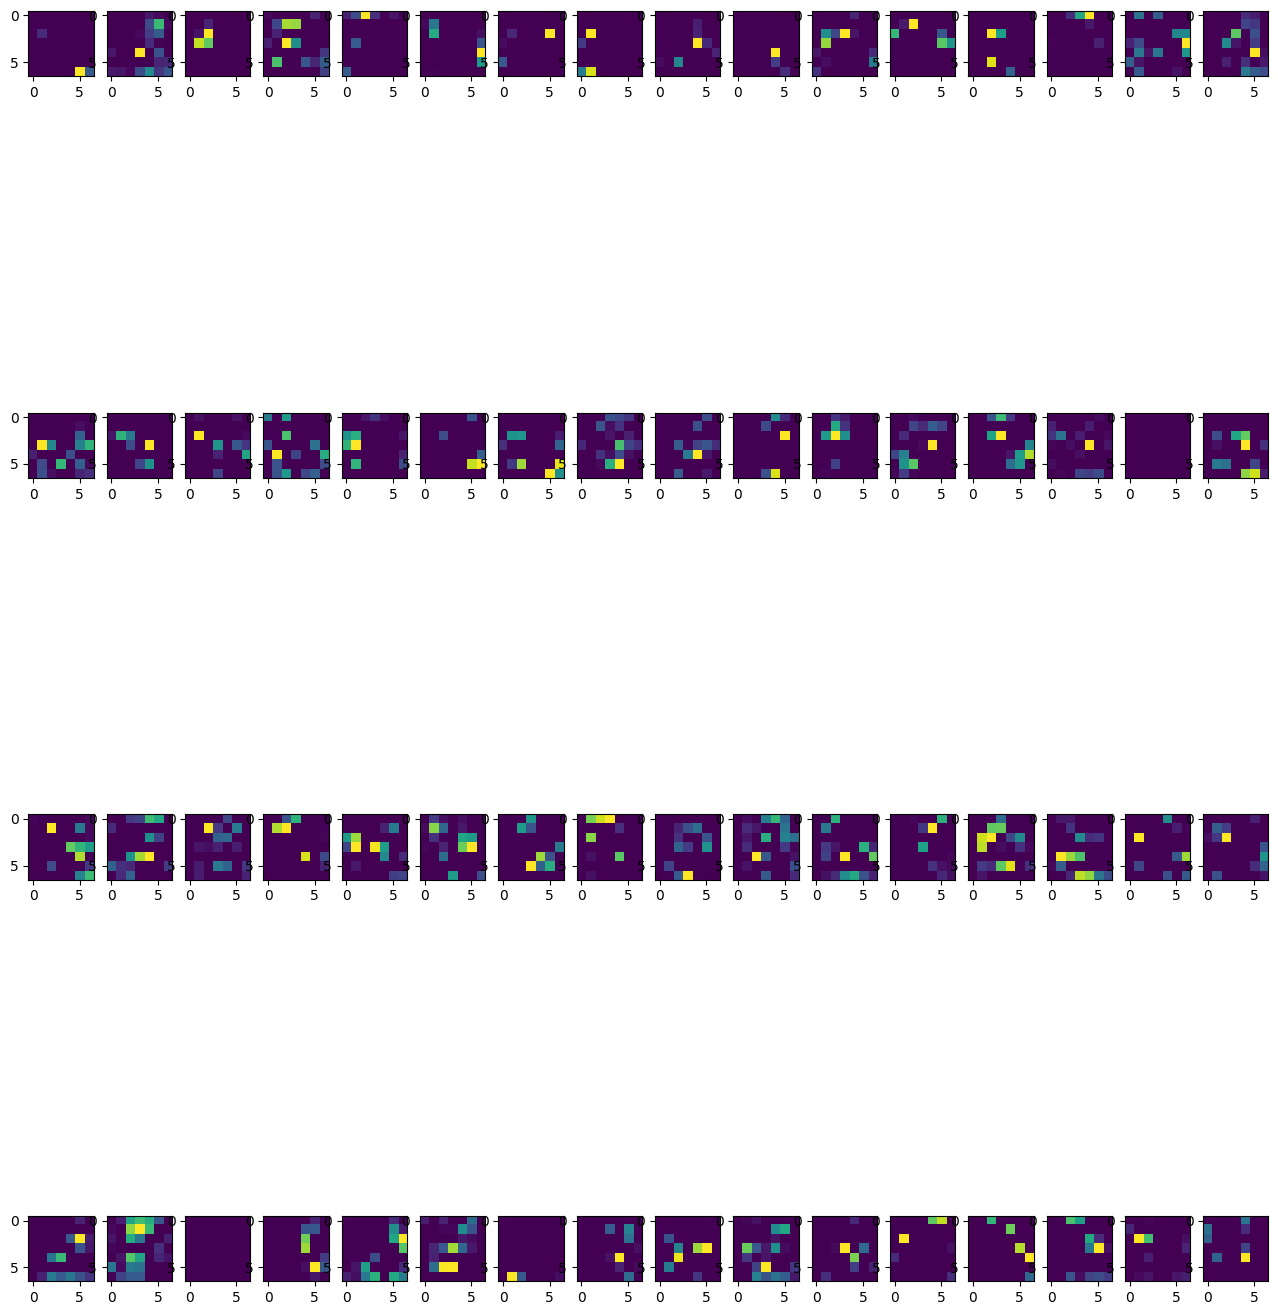

In [118]:
num = 64
num_row = 4 
num_col = 16

fix,axes = plt.subplots(num_row,num_col,figsize = (1*num_col,1.25*num_col))

for i in range(num):
    ax = axes[i//num_col,i%num_col]
    ax.imshow(pool_conv_layer_2_preds[:,:,i])

#plt.tight_layout()
plt.show()

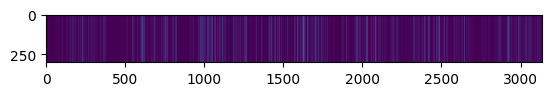

In [119]:
plt.imshow(np.tile(flat_layer_prob,(300,1)))

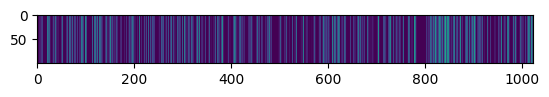

In [120]:
plt.imshow(np.tile(dense_layer_1_preds,(100,1)))

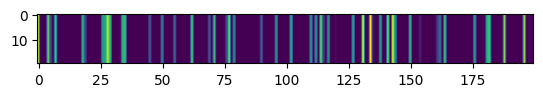

In [121]:
plt.imshow(np.tile(dense_layer_2_preds,(20,1)))

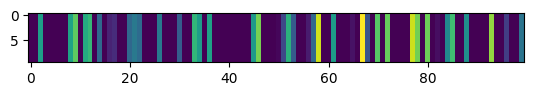

In [122]:
plt.imshow(np.tile(dense_layer_3_preds,(10,1)))

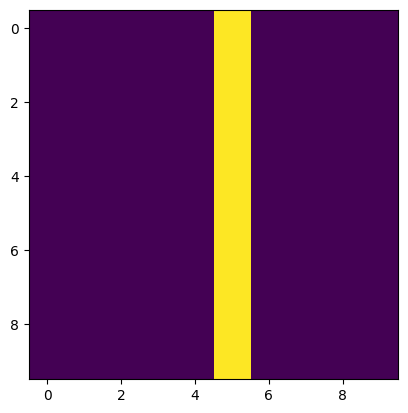

In [123]:
plt.imshow(np.tile(outcome_preds,(10,1)))

In [124]:
from tensorflow.keras.models import model_from_json

In [125]:
model_json = model.to_json()

In [126]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [129]:
model.save_weights("model.weights.h5")